# Task: Prediction using Unsupervised ML

## Objective: To predict the optimum number of clusters and represent it visually

## Presented by: Simran Jain

### IMPORT LIBRARIES

In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans 

### READ THE DATA

In [110]:
df=pd.read_csv('Iris.csv')

In [111]:
df_copy=df.copy()

In [112]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### SHAPE OF THE DATA

In [113]:
print('Number of Observations in Data:', df.shape[0])
print('Number of variables in Data:', df.shape[1])

Number of Observations in Data: 150
Number of variables in Data: 6


### DESCRIBING DATA

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [115]:
df.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [116]:
df.drop(['Id','Species'],inplace=True,axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### DISTRIBUTION OF DATA

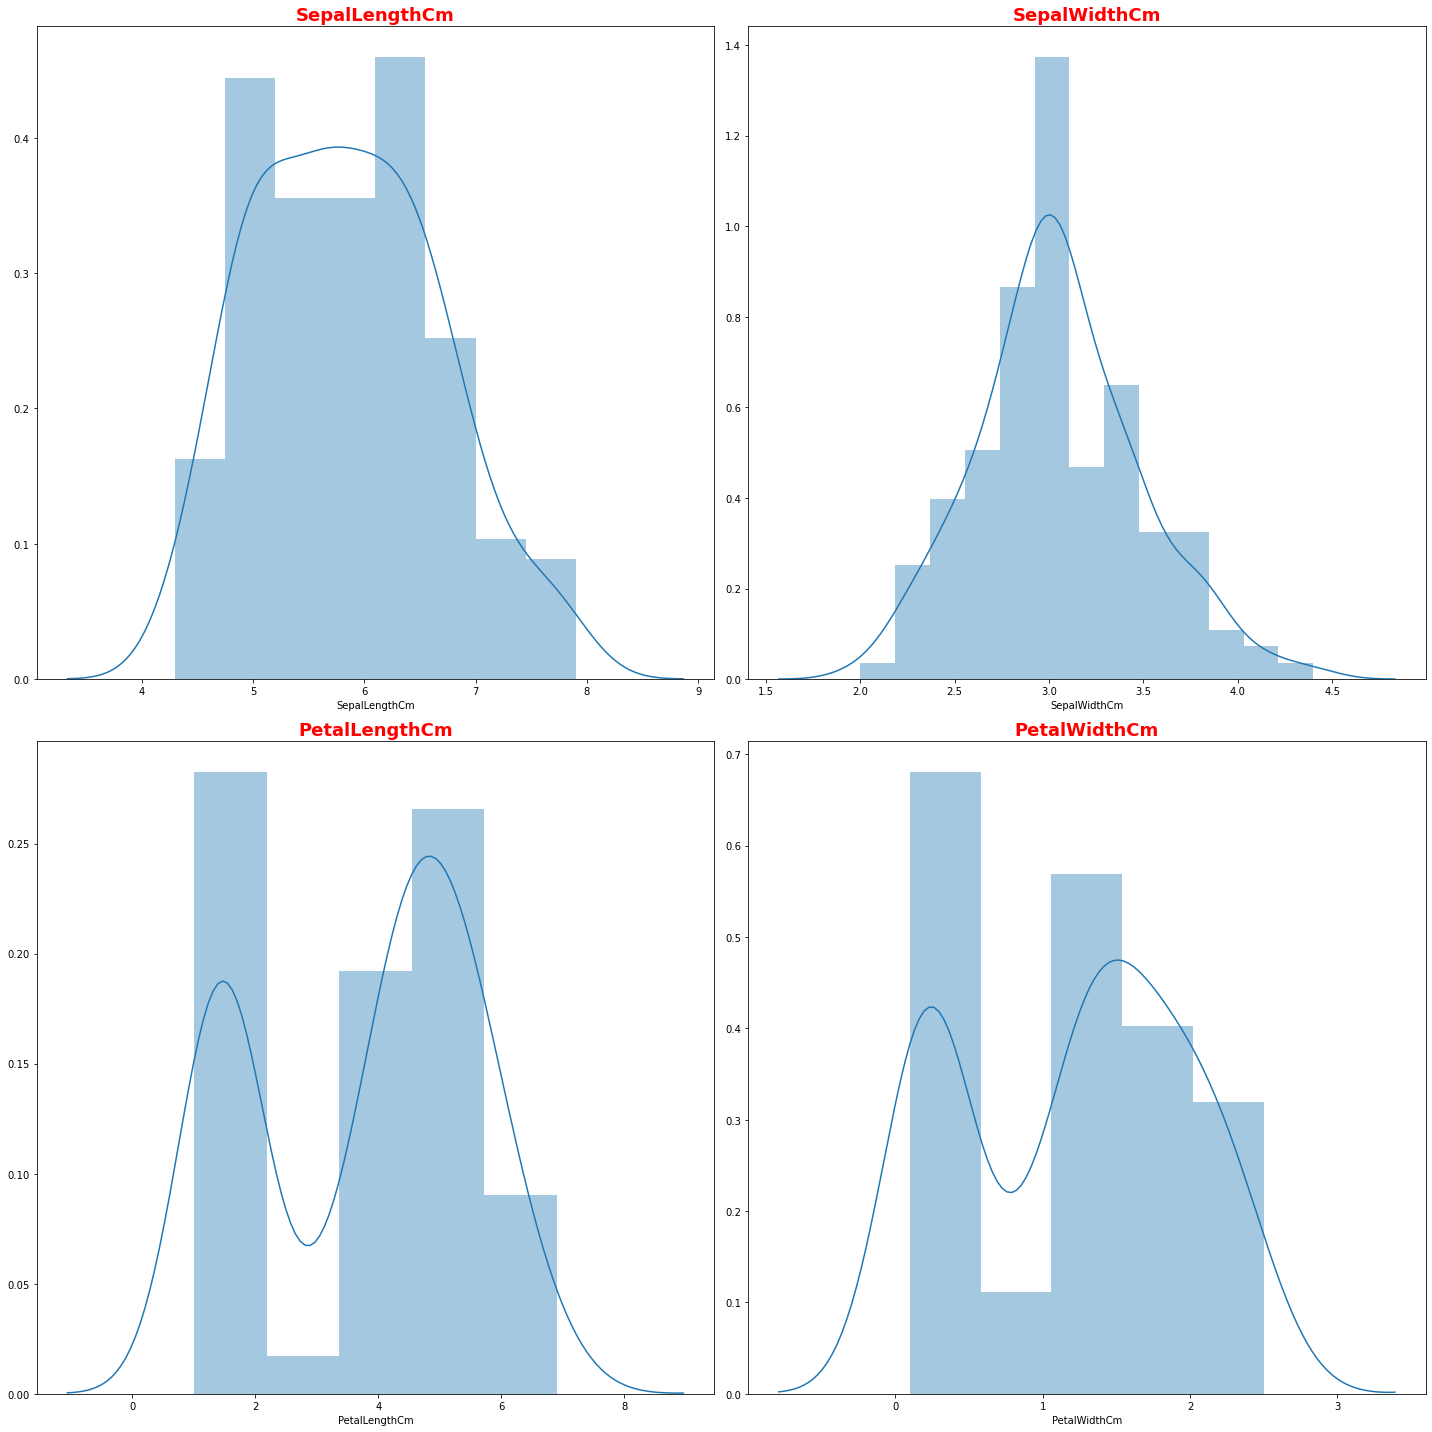

In [117]:
fig=plt.figure(figsize=(20,20))
for i in range(0,len(df.columns)):
    ax=fig.add_subplot(2,2,i+1)
    sns.distplot(df[df.columns[i]])
    ax.set_title(df.columns[i],color='red',fontsize=18,fontweight ='bold')
plt.tight_layout()

In [118]:
df.skew()

SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

### PAIR PLOT

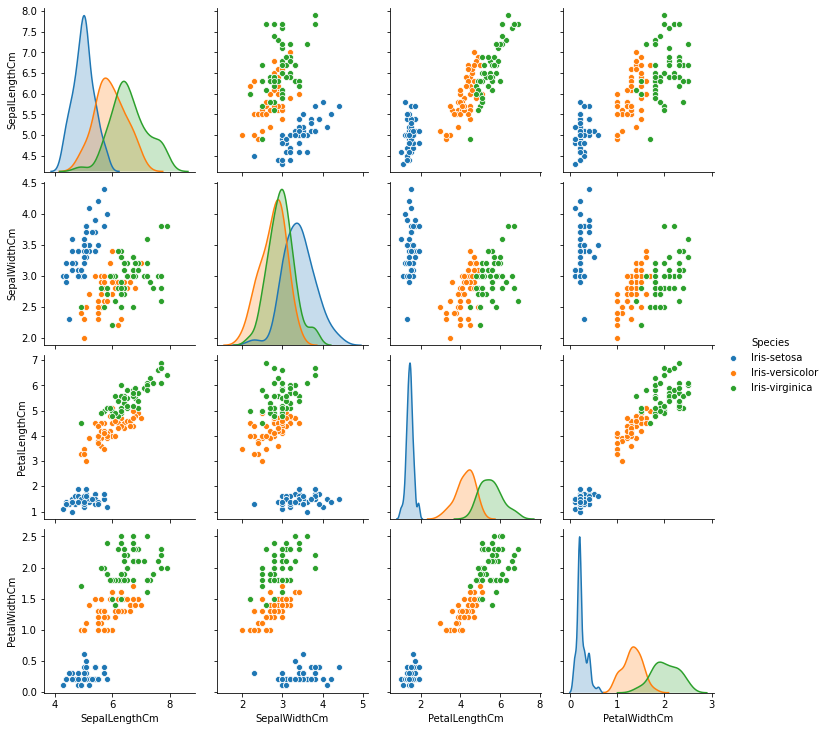

In [126]:
sns.pairplot(df_copy.drop('Id',axis=1),hue='Species')

## BUILDING CLUSTERS

### Calculating WSS for other values of K - Elbow Method

In [119]:
wss =[] 

In [120]:
for i in range(1,11):
    KM = KMeans(n_clusters=i, init = 'k-means++')
    KM.fit(df)
    wss.append(KM.inertia_)

C:\Users\jsimr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [121]:
wss

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.535582051282034,
 38.930963049671746,
 34.299985543844244,
 29.955568877177583,
 27.839591136933254,
 26.073656793498902]

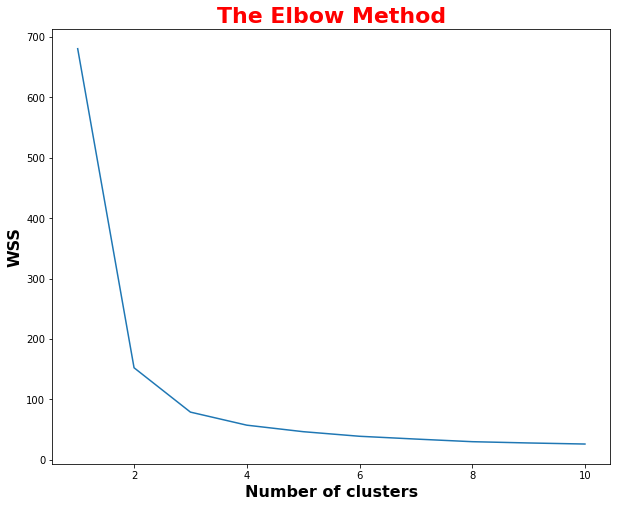

In [122]:
fig=plt.figure(figsize=(10,8))
plt.plot(range(1,11), wss)
plt.title('The Elbow Method',color='red',fontsize=22,fontweight ='bold')
plt.xlabel('Number of clusters',color='black',fontsize=16,fontweight ='bold')
plt.ylabel('WSS',color='black',fontsize=16,fontweight ='bold')
plt.show()

In [123]:
k_means=KMeans(n_clusters=3, init = 'k-means++')
label = k_means.fit_predict(df)
label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

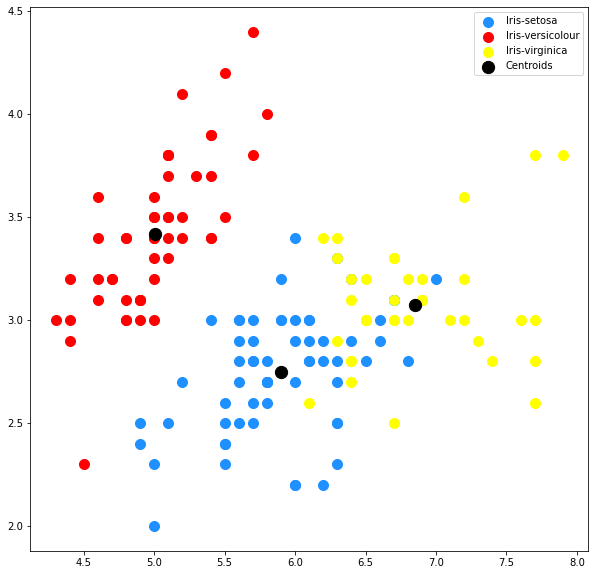

In [124]:
fig=plt.figure(figsize=(10,10))

#filter rows of original data
filtered_label0 = df[label == 0].iloc[:,:].values
filtered_label1 = df[label == 1].iloc[:,:].values
filtered_label2 = df[label == 2].iloc[:,:].values

#Plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] ,s=100, color = 'dodgerblue', label = 'Iris-setosa')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] ,s=100, color = 'red', label = 'Iris-versicolour')
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] ,s=100, color = 'yellow', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:,1],s=150,color = 'black', label = 'Centroids')

plt.legend()